In [1]:
import pandas as pd

In [2]:
cr = pd.read_csv('CreditRisk.csv')

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cr.Gender.fillna('Male',inplace = True)                                 # most frquent vlaue is male
cr.Married.fillna('Yes',inplace = True)                                  # we can't fill yes bcz of married
cr.Dependents.fillna(0,inplace = True)                                # most frquent vlaue
cr.Self_Employed.fillna('No',inplace = True)                            # most frquent vlaue
cr.LoanAmount.fillna(cr.LoanAmount.mean(),inplace = True)               # filled with mean
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(),inplace = True)   # filled with mean    
cr.Credit_History.fillna(0,inplace = True)                            # 1 is good history, 0 is bad history choose bad history


In [6]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
cr.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
cr.Loan_Status = cr.Loan_Status.replace({'Y':1,'N':0})

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # Object create/ run for the first time

In [10]:
cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

In [11]:
cr.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1


In [12]:
cr = cr.drop(['Loan_ID'],axis=1)

In [13]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


### Sampling

In [14]:
from sklearn.model_selection import train_test_split

train_cr,test_cr = train_test_split(cr,test_size=0.2)

In [15]:
train_cr_x = train_cr.iloc[ : , :-1]
train_cr_y = train_cr.iloc[ : , -1]

In [16]:
test_cr_x = test_cr.iloc[ : , :-1]
test_cr_y = test_cr.iloc[ : , -1]

### Model Building

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression()

In [19]:
logreg.fit(train_cr_x,train_cr_y)

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [20]:
pred = logreg.predict(test_cr_x)

In [21]:
pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [22]:
#test_cr_y

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
tab1 = confusion_matrix(test_cr_y,pred)
tab1

array([[ 29,  35],
       [ 10, 123]], dtype=int64)

In [25]:
Accuracy = tab1.diagonal().sum()*100/tab1.sum()
Accuracy

77.15736040609137

In [26]:
from sklearn.metrics import recall_score

In [27]:
recall_score(test_cr_y,pred)*100

92.4812030075188

In [28]:
from sklearn.metrics import precision_score

In [29]:
precision_score(test_cr_y,pred)*100

77.84810126582279

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(test_cr_y,pred)*100

84.5360824742268

### AuRoc

In [33]:
from sklearn.metrics import roc_auc_score,roc_curve

In [34]:
pred_prob = logreg.predict_proba(test_cr_x)
pred_prob
# probability should not be close toeach other 

array([[0.63458583, 0.36541417],
       [0.11698571, 0.88301429],
       [0.10608034, 0.89391966],
       [0.08852637, 0.91147363],
       [0.111115  , 0.888885  ],
       [0.54304095, 0.45695905],
       [0.17403788, 0.82596212],
       [0.36879366, 0.63120634],
       [0.07436932, 0.92563068],
       [0.25995603, 0.74004397],
       [0.43952468, 0.56047532],
       [0.75022688, 0.24977312],
       [0.17954763, 0.82045237],
       [0.12438348, 0.87561652],
       [0.31561462, 0.68438538],
       [0.14058703, 0.85941297],
       [0.07918057, 0.92081943],
       [0.62360954, 0.37639046],
       [0.07135511, 0.92864489],
       [0.66548711, 0.33451289],
       [0.18541383, 0.81458617],
       [0.16999354, 0.83000646],
       [0.35795068, 0.64204932],
       [0.20264859, 0.79735141],
       [0.07473361, 0.92526639],
       [0.23199237, 0.76800763],
       [0.22961806, 0.77038194],
       [0.09919343, 0.90080657],
       [0.23266656, 0.76733344],
       [0.75892395, 0.24107605],
       [0.

In [38]:
roc_auc_score(test_cr_y,pred_prob[ : , 1])

# Area under the curve

0.7711466165413534

In [39]:
fpr, tpr, thresh = roc_curve(test_cr_y,pred_prob[ : ,1])

In [40]:
import matplotlib.pyplot as plt

Text(0.3, 0.5, 'Area under curve is 0.77')

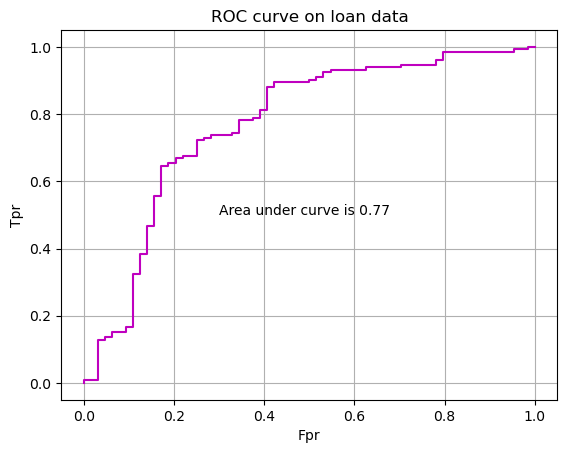

In [46]:
plt.plot(fpr,tpr, color = 'm')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve on loan data')
plt.grid()
plt.text(x=.3,y=.5,s = "Area under curve is 0.77")